In [177]:
import numpy as np
import pandas as pd
import re

df = pd.read_csv('tweets_public.csv', encoding='utf-16', index_col='tweet_id', sep=',')
df.columns.tolist()

['airline_sentiment',
 'is_reply',
 'reply_count',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone']

In [178]:
# Force datatime on the `tweet_created` column
weekdays = pd.to_datetime(df.tweet_created).dt.dayofweek
df['weekday'] = pd.Series(weekdays, index=df.index)
#df.tweet_created = pd.to_datetime(df.tweet_created)

# How many tweets do we have?
print("Number of tweets:", df.shape[0])

# Show first rows on dataframe
df.head(4)

Number of tweets: 7867


,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,weekday
tweet_id,,,,,,,,,,
942743012337123328,positive,False,0,0,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,Mon Dec 18 13:07:04 +0000 2017,NaN,Dublin,0
926857871916183553,positive,True,0,0,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,Sat Nov 04 17:05:11 +0000 2017,NaN,NaN,5
936979305720090626,neutral,True,0,0,@Iberia Me dirías por favor que costo tiene?,NaN,Sat Dec 02 15:24:09 +0000 2017,NaN,NaN,5
943983853802328064,negative,True,0,0,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,Thu Dec 21 23:17:43 +0000 2017,NaN,Central Time (US & Canada),3


In [179]:
hoursday = pd.to_datetime(df.tweet_created).dt.dayofweek

In [180]:
weekday_names = []
wn = ['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo']
for d in df.weekday:
    weekday_names.append(wn[d])
df['weekday_names'] = pd.Series(weekday_names, index=df.index)


In [181]:
hh = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

In [182]:
hoursday = pd.to_datetime(df.tweet_created).dt.hour
df['hoursday'] = pd.Series(hoursday, index=df.index)
df.head()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,weekday,weekday_names,hoursday
tweet_id,,,,,,,,,,,,
942743012337123328,positive,False,0,0,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,Mon Dec 18 13:07:04 +0000 2017,NaN,Dublin,0,lunes,13
926857871916183553,positive,True,0,0,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,Sat Nov 04 17:05:11 +0000 2017,NaN,NaN,5,sabado,17
936979305720090626,neutral,True,0,0,@Iberia Me dirías por favor que costo tiene?,NaN,Sat Dec 02 15:24:09 +0000 2017,NaN,NaN,5,sabado,15
943983853802328064,negative,True,0,0,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,Thu Dec 21 23:17:43 +0000 2017,NaN,Central Time (US & Canada),3,jueves,23
938207464457211904,negative,True,0,0,@SrtaFarrellDM @KLM @Iberia Eso de avianca es ...,NaN,Wed Dec 06 00:44:25 +0000 2017,NaN,Eastern Time (US & Canada),2,miercoles,0


In [183]:
print (df.shape)

(7867, 12)


In [184]:
df['airline_sentiment'].unique()
counts = df.groupby('airline_sentiment').size()
print(counts) 

airline_sentiment
negative    3788
neutral     2555
positive    1524
dtype: int64


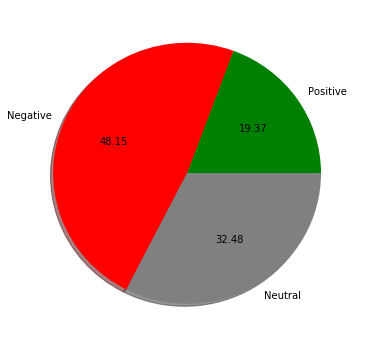

In [185]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.pie([counts[2],counts[0],counts[1]],labels=['Positive','Negative','Neutral'],colors=['g','r','gray'],shadow=True,autopct ='%.2f' )
fig = plt.gcf()
fig.set_size_inches(6,6)
fig.savefig('figure.pdf', bbox_inches='tight')

In [186]:
df['retweet_count'].unique()

array([0])

In [187]:
df['reply_count'].unique()

array([0])

In [188]:
df.drop(['retweet_count','reply_count'], axis=1)

,airline_sentiment,is_reply,text,tweet_coord,tweet_created,tweet_location,user_timezone,weekday,weekday_names,hoursday
tweet_id,,,,,,,,,,
942743012337123328,positive,False,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,Mon Dec 18 13:07:04 +0000 2017,NaN,Dublin,0,lunes,13
926857871916183553,positive,True,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,Sat Nov 04 17:05:11 +0000 2017,NaN,NaN,5,sabado,17
936979305720090626,neutral,True,@Iberia Me dirías por favor que costo tiene?,NaN,Sat Dec 02 15:24:09 +0000 2017,NaN,NaN,5,sabado,15
943983853802328064,negative,True,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,Thu Dec 21 23:17:43 +0000 2017,NaN,Central Time (US & Canada),3,jueves,23
938207464457211904,negative,True,@SrtaFarrellDM @KLM @Iberia Eso de avianca es ...,NaN,Wed Dec 06 00:44:25 +0000 2017,NaN,Eastern Time (US & Canada),2,miercoles,0
931526746301714435,neutral,True,"@Iberia hola, no conozco mi numéro IBERIA PLUS...",NaN,Fri Nov 17 14:17:37 +0000 2017,NaN,NaN,4,viernes,14
933385784228532233,neutral,False,El canal Smithsonian reconstruye en video el a...,NaN,Wed Nov 22 17:24:47 +0000 2017,NaN,NaN,2,miercoles,17
932856751099142144,positive,False,"Con @Iberia, mi destino a un solo click. ¡Dese...",NaN,Tue Nov 21 06:22:35 +0000 2017,NaN,NaN,1,martes,6
927623530585509889,negative,True,@facua Pueden ayudarme con una maleta perdida ...,NaN,Mon Nov 06 19:47:38 +0000 2017,NaN,NaN,0,lunes,19


In [189]:
mask = df['user_timezone'].isnull()
print("Num of non Nan positions:",len(df.user_timezone) - len(df.user_timezone[mask])) 

Num of non Nan positions: 5119


In [190]:
df['tweet_coord'].unique()

array([nan, '[43.248521, -2.947576]', '[28.4380525, -16.3998475]',
       '[41.30112848, 2.07474354]', '[40.47222222, -3.56083333]',
       '[43.42319443, -3.82403537]', '[42.88277778, -2.72444444]',
       '[41.30218123, 2.07590243]', '[-0.13555556, -78.36555556]',
       '[43.36, -5.845]', '[37.18861111, -3.77722222]',
       '[40.5, -3.66666667]', '[43.31001, -8.37273]',
       '[38.7167, -9.13333]', '[40.49483116, -3.56685028]',
       '[43.301111, -2.910556]', '[41.795636, 12.252037]',
       '[4.71920636, -74.06686107]', '[39.62861111, -8.66527778]',
       '[45.7, 9.6667]'], dtype=object)

In [191]:
def delete_urlvideo(tweet):
    #Delete URLs www.* or https?://*
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    #Delete VIDEO
    tweet = re.sub('((\[VIDEO\])|(#VIDEO)|#vIDEO)','',tweet)
    return tweet


def remove_duplicated_tweets(df):
    # Delete duplicated tweets
    df['text'] = df['text'].apply(delete_urlvideo)
    df2 = df.drop_duplicates(subset='text',keep=False) 
    return df2

In [108]:
df = remove_duplicated_tweets(df)

In [192]:
# Force the index to be the creation date
df_by_date = df.set_index('tweet_created')
# Select only airline_sentiment
df_date_sent = df_by_date[['airline_sentiment']]
# Create a one-hot encoding.
sent_onehot = pd.get_dummies(df_date_sent['airline_sentiment'])
sent_onehot.head()

,negative,neutral,positive
tweet_created,,,
Mon Dec 18 13:07:04 +0000 2017,0,0,1
Sat Nov 04 17:05:11 +0000 2017,0,0,1
Sat Dec 02 15:24:09 +0000 2017,0,1,0
Thu Dec 21 23:17:43 +0000 2017,1,0,0
Wed Dec 06 00:44:25 +0000 2017,1,0,0


In [193]:
df_by_timezone = df.set_index('user_timezone')
sent_onehot_timezone = pd.get_dummies(df_by_timezone['airline_sentiment'])

In [194]:
sent_onehot_timezone

,negative,neutral,positive
user_timezone,,,
Dublin,0,0,1
NaN,0,0,1
NaN,0,1,0
Central Time (US & Canada),1,0,0
Eastern Time (US & Canada),1,0,0
NaN,0,1,0
NaN,0,1,0
NaN,0,0,1
NaN,1,0,0


In [195]:
sent_onehot.index = pd.to_datetime(sent_onehot.index)

In [196]:
sent_onehot.sort_index(ascending=True)

,negative,neutral,positive
tweet_created,,,
2017-10-25 10:00:48,1,0,0
2017-10-25 10:04:14,0,0,1
2017-10-25 10:04:42,1,0,0
2017-10-25 10:06:07,0,1,0
2017-10-25 10:06:56,0,1,0
2017-10-25 10:08:19,1,0,0
2017-10-25 10:27:17,1,0,0
2017-10-25 10:27:28,0,1,0
2017-10-25 10:31:26,0,1,0


[17460 17471 17501 17532 17542] <a list of 5 Text xticklabel objects>


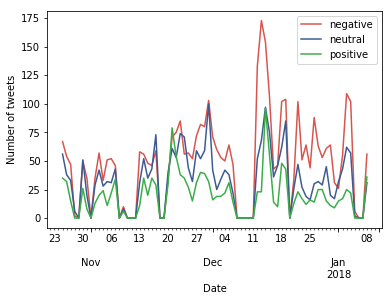

In [197]:
time_histogram = sent_onehot.groupby(pd.Grouper(freq='D')).sum()
import seaborn as sns
# Lines plot
ax = time_histogram.plot(color=[sns.xkcd_rgb["pale red"], 
                      sns.xkcd_rgb["denim blue"], 
                      sns.xkcd_rgb["medium green"]])
ax.set_ylabel('Number of tweets')
ax.set_xlabel('Date')
print(ax.get_xticks(), ax.get_xticklabels())

In [198]:
time_histogram.negative = time_histogram.negative/time_histogram.negative.sum()
time_histogram.neutral = time_histogram.neutral/time_histogram.neutral.sum()
time_histogram.positive = time_histogram.positive/time_histogram.positive.sum()

Text(0.5,0,'Date')

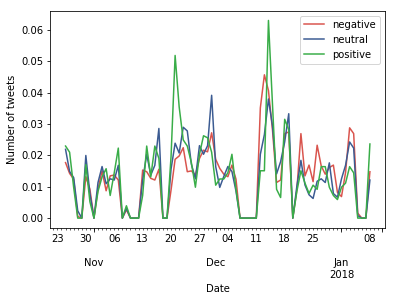

In [199]:
# Lines plot
ax = time_histogram.plot(color=[sns.xkcd_rgb["pale red"], 
                      sns.xkcd_rgb["denim blue"], 
                      sns.xkcd_rgb["medium green"]])
ax.set_ylabel('Number of tweets')
ax.set_xlabel('Date')

In [200]:
df.tweet_created = pd.to_datetime(df.tweet_created)

In [201]:
hours = []
for e in df.tweet_created:
    hours.append(e.hour)

In [202]:
date1 = df.tweet_created.values[0]

In [203]:
type(date1)

numpy.datetime64

In [204]:
df['hours'] = pd.Series(hours, index=df.index)

In [205]:
df.index = pd.to_timedelta(df.hours)

In [206]:
df.head()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,weekday,weekday_names,hoursday,hours
hours,,,,,,,,,,,,,
00:00:00.000000,positive,False,0,0,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,2017-12-18 13:07:04,NaN,Dublin,0,lunes,13,13
00:00:00.000000,positive,True,0,0,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,2017-11-04 17:05:11,NaN,NaN,5,sabado,17,17
00:00:00.000000,neutral,True,0,0,@Iberia Me dirías por favor que costo tiene?,NaN,2017-12-02 15:24:09,NaN,NaN,5,sabado,15,15
00:00:00.000000,negative,True,0,0,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,2017-12-21 23:17:43,NaN,Central Time (US & Canada),3,jueves,23,23
00:00:00,negative,True,0,0,@SrtaFarrellDM @KLM @Iberia Eso de avianca es ...,NaN,2017-12-06 00:44:25,NaN,Eastern Time (US & Canada),2,miercoles,0,0


Text(0.5,0,'Hour')

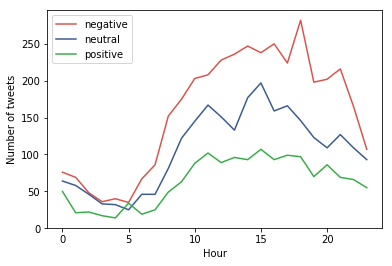

In [207]:
# Force the index to be the creation date
df_by_hours = df.set_index('hours')
# Select only airline_sentiment
df_hours_sent = df_by_hours[['airline_sentiment']]
# Create a one-hot encoding.
sent_hours_onehot = pd.get_dummies(df_hours_sent['airline_sentiment'])

hour_histogram = sent_hours_onehot.groupby('hours').sum()

import seaborn as sns
# Lines plot
ax = hour_histogram.plot(color=[sns.xkcd_rgb["pale red"], 
                      sns.xkcd_rgb["denim blue"], 
                      sns.xkcd_rgb["medium green"]])
ax.set_ylabel('Number of tweets')
ax.set_xlabel('Hour')

In [208]:
df_h = df[df.hours == 18]

Text(0.5,0,'Hour')

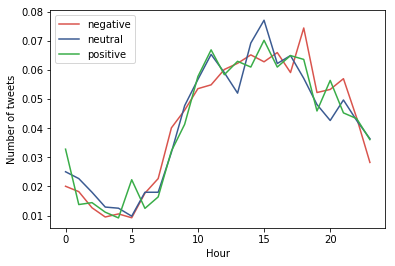

In [209]:
hour_histogram.negative = hour_histogram.negative/hour_histogram.negative.sum()
hour_histogram.neutral = hour_histogram.neutral/hour_histogram.neutral.sum()
hour_histogram.positive = hour_histogram.positive/hour_histogram.positive.sum()

ax = hour_histogram.plot(color=[sns.xkcd_rgb["pale red"], 
                      sns.xkcd_rgb["denim blue"], 
                      sns.xkcd_rgb["medium green"]])
ax.set_ylabel('Number of tweets')
ax.set_xlabel('Hour')

In [210]:
df['is_reply'].unique()

array([False,  True])

In [211]:
df.groupby('is_reply').size()

is_reply
False    4076
True     3791
dtype: int64

/Users/pere/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  import sys


Text(0.5,0,'Date')

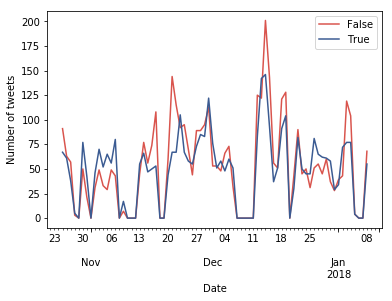

In [212]:
# Select only is_reply
df_date_sent = df_by_date[['is_reply']]
# Create a one-hot encoding.
sent_onehot = pd.get_dummies(df_date_sent['is_reply'])
sent_onehot.index = pd.to_datetime(sent_onehot.index)

time_histogram = sent_onehot.groupby(pd.TimeGrouper('D')).sum()

import seaborn as sns
# Lines plot
ax = time_histogram.plot(color=[sns.xkcd_rgb["pale red"], 
                      sns.xkcd_rgb["denim blue"]])
ax.set_ylabel('Number of tweets')
ax.set_xlabel('Date')

In [213]:
len(df['tweet_location'].unique())

230

In [214]:
len(df['user_timezone'].unique())

89

/Users/pere/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


Text(0.5,0,'Date')

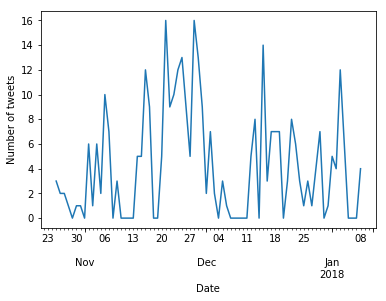

In [215]:
# Select only is_reply
df_date_sent = df_by_date[['user_timezone']]
# Create a one-hot encoding.
sent_onehot = pd.get_dummies(df_date_sent['user_timezone'])
sent_onehot.index = pd.to_datetime(sent_onehot.index)
time_histogram = sent_onehot.groupby(pd.TimeGrouper('D')).sum()

import seaborn as sns
# Lines plot
ax = time_histogram['Buenos Aires'].plot()
ax.set_ylabel('Number of tweets')
ax.set_xlabel('Date')

In [216]:
time_histogram.sum()

Alaska                               2
America/Argentina/Buenos_Aires       4
America/Barbados                     6
America/Buenos_Aires                 1
America/Caracas                      3
America/Chihuahua                    1
America/Costa_Rica                   1
America/Guayaquil                    1
America/Lima                         1
America/Manaus                       1
America/Mexico_City                  1
America/Santiago                     5
Amsterdam                          240
Arizona                              3
Athens                             243
Atlantic Time (Canada)              30
Azores                               1
Bangkok                              1
Beijing                              5
Belgrade                            24
Berlin                              15
Bern                                 4
Bogota                             211
Brasilia                            58
Brussels                            19
Bucharest                

In [217]:
def processTweet2(tweet):
    # process the tweets
    #Convert to lower case
    tweet = tweet.lower()
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    return tweet  

def preprocess_word(word):
    # Remove punctuation
    #word = word.strip('\'"?!,.():;')
    word = word.strip('\'"?!,.')
    # Convert more than 2 letter repetitions to 2 letter
    # funnnnny --> funny
    word = re.sub(r'(.)\1+', r'\1\1', word)
    # Remove - & '
    word = re.sub(r'(-|\')', '', word)
    # remove numbers
    word = re.sub(r'\d+','',word)
    # Remove accents
    word = unidecode.unidecode(word)

    return word


In [218]:
#data = df['user_timezone']
#data.apply(pd.value_counts).plot(kind='bar', subplots=True)

In [219]:
import unidecode
tweets2 = [processTweet2(tweet) for tweet in df.text.values]
tweets3 = [' '.join(preprocess_word(word) for word in tweet.split(' ')) for tweet in tweets2]
df.text = tweets3

In [220]:
df.head()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,weekday,weekday_names,hoursday,hours
hours,,,,,,,,,,,,,
00:00:00.000000,positive,False,0,0,los pilotos de ryanair desconvocan la huelga t...,NaN,2017-12-18 13:07:04,NaN,Dublin,0,lunes,13,13
00:00:00.000000,positive,True,0,0,@iberia @lavecinarubia si por favor las declar...,NaN,2017-11-04 17:05:11,NaN,NaN,5,sabado,17,17
00:00:00.000000,neutral,True,0,0,@iberia me dirias por favor que costo tiene,NaN,2017-12-02 15:24:09,NaN,NaN,5,sabado,15,15
00:00:00.000000,negative,True,0,0,@supermanlopezn @iberia @giroditalia champion ...,NaN,2017-12-21 23:17:43,NaN,Central Time (US & Canada),3,jueves,23,23
00:00:00,negative,True,0,0,@srtafarrelldm @klm @iberia eso de avianca es ...,NaN,2017-12-06 00:44:25,NaN,Eastern Time (US & Canada),2,miercoles,0,0


In [221]:
from sklearn.model_selection import train_test_split
# Divide data in train and test
train, test = train_test_split(df, test_size=0.25)
print (len(train),len(test))

5900 1967


In [222]:
# Separate in groups
dfpo = df[df['airline_sentiment']=='positive']
dfng = df[df['airline_sentiment']=='negative']
dfne = df[df['airline_sentiment']=='neutral']

print(dfpo.shape,dfng.shape,dfne.shape)

(1524, 13) (3788, 13) (2555, 13)


Afegir airline a tweet, afegir-hi hora, afegir-hi dia de setmana

In [223]:
airlines = []
for t in df.text.values:
    al_tweet = []
    tweet = t
    words = tweet.split()
    for w in words:
        if w[0] == "@":
            al_tweet.append(w[1:])
    airlines.append(al_tweet)

In [224]:
airlines = []
for t in df.text.values:
    tweet = t
    words = tweet.split()
    for w in words:
        if w[0] == "@":
            airlines.append(w[1:])

In [225]:
np.unique(airlines)

array(['', '/ryanair', '__eli', ..., 'zrhworker', 'zumitropi',
       'zumosoles'], dtype='<U29')

In [226]:
hashtags = []
for t in df.text.values:
    tweet = t
    words = tweet.split()
    for w in words:
        if w[0] == "#":
            hashtags.append(w[1:])

In [227]:
len(np.unique(hashtags))

780

(array([917., 209., 132., 119., 110., 100.,  93.,  82.,  81.,  80.]),
 array([  0. ,  77.9, 155.8, 233.7, 311.6, 389.5, 467.4, 545.3, 623.2,
        701.1, 779. ]),
 <a list of 10 Patch objects>)

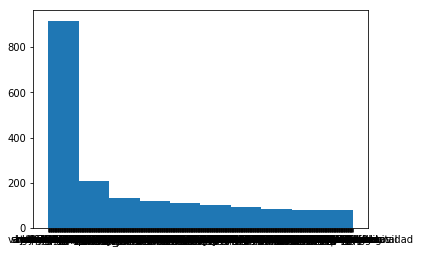

In [228]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(hashtags)

In [229]:
from collections import Counter

letter_counts = Counter(hashtags)
df1 = pd.DataFrame.from_dict(letter_counts, orient='index')
df1.sort_values(by=0, ascending=False)

letter_counts = Counter(airlines)
df2 = pd.DataFrame.from_dict(letter_counts, orient='index')
#df2.sort_values(by=0, ascending=False)

df2.head()

,0
iberia,3716
lavecinarubia,10
supermanlopezn,33
giroditalia,19
srtafarrelldm,1


In [230]:
hashtag_df = df1.sort_values(by=0, ascending=False)
number_more_repeated_hashtags = hashtag_df.sum()
total_number_of_repetition_hashtags = df1.sort_values(by=0, ascending=False).sum()
#hashtag_df = hashtag_df.append({0 : total_number_of_repetition_hashtags - number_more_repeated_hashtags}, ignore_index=True)
print(total_number_of_repetition_hashtags)


0    1923
dtype: int64


                         0
0                      203
1                      183
2                      105
3                       91
4                       64
5                       47
6                       26
7                       23
8                       17
9                       15
10  0    1149
dtype: int64


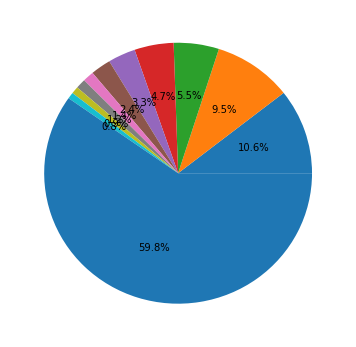

In [234]:
hashtag_df = df1.sort_values(by=0, ascending=False).head(10)
number_more_repeated_hashtags = hashtag_df.sum()
total_number_of_repetition_hashtags = df1.sort_values(by=0, ascending=False).sum()
hashtag_df = hashtag_df.append({0 : total_number_of_repetition_hashtags - number_more_repeated_hashtags}, ignore_index=True)
print(hashtag_df)


plt.pie(hashtag_df,autopct ='%.1f%%')
fig = plt.gcf()
fig.set_size_inches(6,6)
fig.savefig('hashtag_pie.png', bbox_inches='tight', dpi=300)

In [232]:
hashtag_df[hashtag_df >= 15].sum()

0    774.0
dtype: float64

In [126]:
df.head()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,weekday,weekday_names,hoursday,hours
hours,,,,,,,,,,,,,
00:00:00.000000,positive,False,0,0,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,2017-12-18 13:07:04,NaN,Dublin,0,lunes,13,13
00:00:00.000000,positive,True,0,0,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,2017-11-04 17:05:11,NaN,NaN,5,sabado,17,17
00:00:00.000000,neutral,True,0,0,@Iberia Me dirías por favor que costo tiene?,NaN,2017-12-02 15:24:09,NaN,NaN,5,sabado,15,15
00:00:00.000000,negative,True,0,0,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,2017-12-21 23:17:43,NaN,Central Time (US & Canada),3,jueves,23,23
00:00:00,negative,True,0,0,@SrtaFarrellDM @KLM @Iberia Eso de avianca es ...,NaN,2017-12-06 00:44:25,NaN,Eastern Time (US & Canada),2,miercoles,0,0


In [ ]:
letter_counts.values()

In [ ]:
new_corpus = [' '.join('Ryanair') for tweet in df.text.values if 'yanair' in tweet.split()]

In [ ]:
new_corpus

In [ ]:
df.text.values

In [ ]:
len(airlines)

In [ ]:
len(df)

In [ ]:
kk = 'aixo es @una @prova @de @merda'

In [ ]:
al = []
ws = kk.split()
for w in ws:
    if w[0] == '@':
        al.append(w[1:])

In [ ]:
al

In [ ]:
df['airline'] = airlines

In [ ]:
df.airline.values

In [ ]:
al = ['Ryanair', 'Vueling', 'Iberia', 'AirEuropa']